# Image Classification with CNN
The idea of this model is to class the animals into their own species based in a few features  

### Load Dataset and Import First Libraries

In [ ]:
#import nvidia.cudnn
%pip install seaborn
import numpy as np
from data_organizer import organize_data
from plot_data import plot_raw_data
from model_1 import model_1
from model_sofia import model_sofia
from model_sofia_augmented import model_sofia_augmented
from model_resnet import model_resnet
from tensorflow.keras.datasets import cifar10


"""
Download dataset
"""
# Load CIFAR-10 dataset and split into training data and tests data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


2025-10-23 17:49:50.240752: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Normalize Data / Clean up (Filter Animal classes)

x_train_filtered shape: (30000, 32, 32, 3)
y_train_filtered shape: (30000, 6)
x_test_filtered shape: (6000, 32, 32, 3)
y_test_filtered shape: (6000, 6)


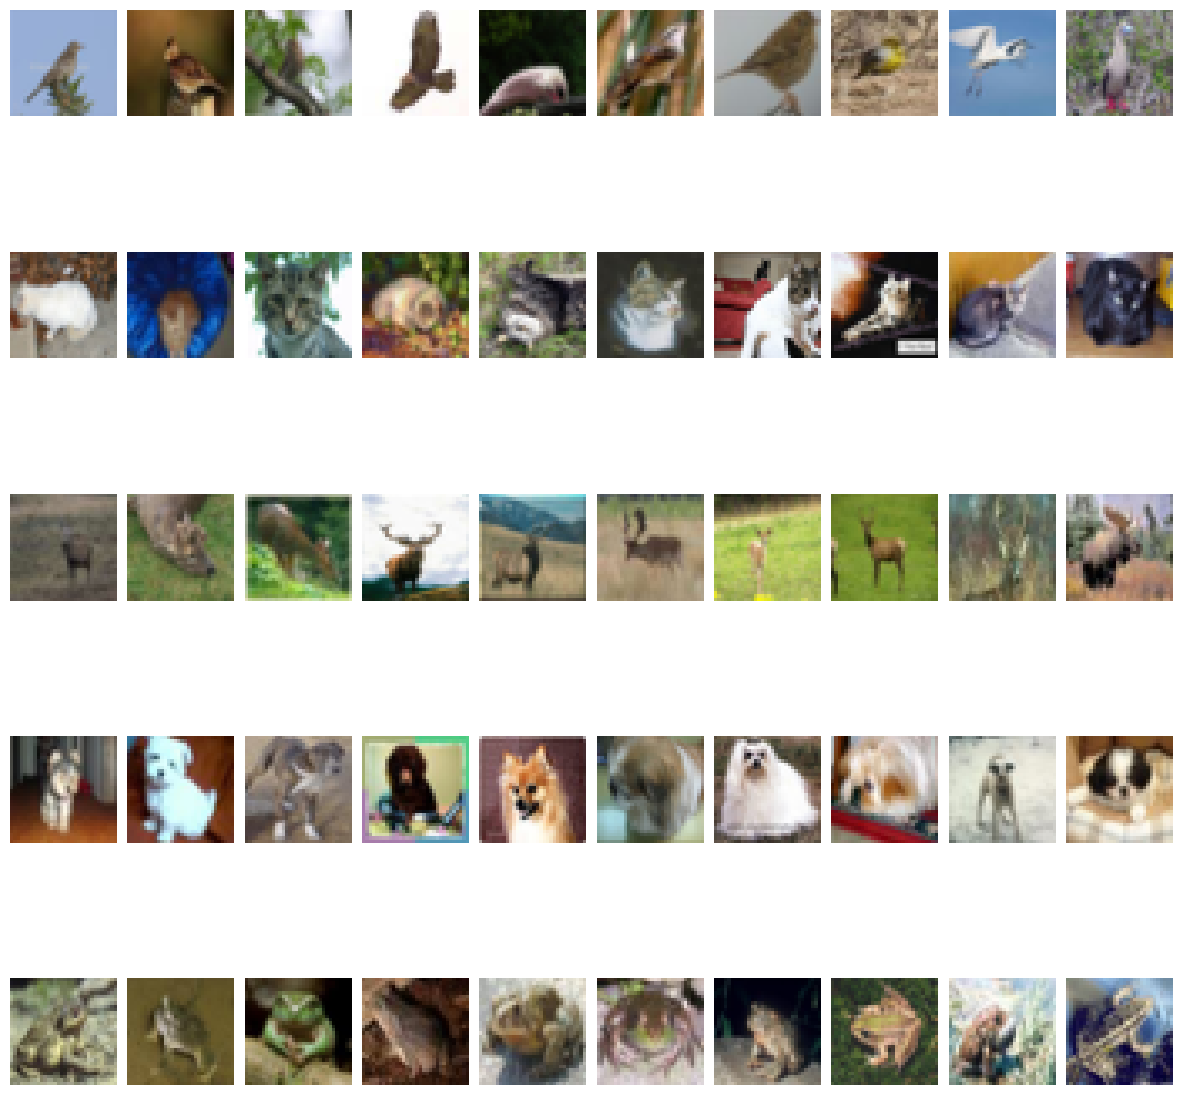

In [2]:
# Animal classes in CIFAR-10: 2 (bird), 3 (cat), 4 (deer), 5 (dog), 6 (frog), 7 (horse)
animal_classes = [2, 3, 4, 5, 6, 7]
input_shape = (32, 32, 3)

x_train_animals, y_train_animals, x_test_animals, y_test_animals, x_train_plot, y_train_plot = organize_data(x_train, y_train, x_test, y_test, animal_classes)

## Visualisize images
# read call lables
class_names = np.unique(y_train_plot)
plot_raw_data(class_names, x_train_plot, y_train_plot, 5, 10)


### Build Model And Train It

In [3]:
from keras.backend import clear_session
clear_session()

In [ ]:
## models Georg
#model_1(x_train_animals, y_train_animals, x_test_animals, y_test_animals, input_shape)
#model_resnet(x_train_animals, y_train_animals, x_test_animals, y_test_animals)

## models Sofia
#model_sofia(x_train_animals, y_train_animals, x_test_animals, y_test_animals, input_shape)
model_sofia_augmented(x_train, y_train, x_test, y_test, input_shape)

/home/georg/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1761234596.898914  172499 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6073 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


/home/georg/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-10-23 17:49:59.147057: I external/local_xla/xla/service/service.cc:163] XLA service 0x78fce400c840 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-23 17:49:59.147096: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2025-10-23 17:49:59.185243: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-23 17:49:59.365331: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.

  8/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.0944 - loss: 2.3147

I0000 00:00:1761234601.191111  172572 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2803 - loss: 1.9385

2025-10-23 17:50:20.669359: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[32,32,30,30]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2025-10-23 17:50:20.704088: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[32,64,13,13]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,15,15]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationFor

625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.3510 - loss: 1.7675 - val_accuracy: 0.4738 - val_loss: 1.4469
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.4498 - loss: 1.5223 - val_accuracy: 0.5249 - val_loss: 1.3139
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.4859 - loss: 1.4276 - val_accuracy: 0.5789 - val_loss: 1.1789
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.5177 - loss: 1.3543 - val_accuracy: 0.5664 - val_loss: 1.1990
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.5334 - loss: 1.3056 - val_accuracy: 0.6065 - val_loss: 1.1076
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.5556 - loss: 1.2549 - val_accuracy: 0.6322 - val_loss: 1.0493
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.5660 - loss: 1.2239 - val_accuracy: 0.6351 - val_loss: 1.0221
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.5792 - loss: 1.1959 - val_accurac